# 데이터 사용
- 60000개의 이미지 : 뉴런 네트워크를 훈련
- 10000개의 이미지 : 뉴런 네트워크에서 이미지 분류를 학습한 정도를 평가


# 이미지
- 이미지는 28x28 크기의 넘파이 배열이고 픽셀 값은 0과 255 사이입니다.
- 레이블(label)은 0에서 9까지의 정수 배열입니다.
- 이 값은 이미지에 있는 옷의 클래스(class)를 나타냅니다.

```
레이블	클래스
0	      T-shirt/top
1	      Trouser
2	      Pullover
3	      Dress
4	      Coat
5	      Sandal
6	      Shirt
7	      Sneaker
8	      Bag
9	      Ankle boot
```


In [ ]:
# 패키지 임포트

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

print("version :", tf.__version__, "\n")

fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

print("\n========== 데이터 탐색 ==========\n")

print(f"train_images.shape : {train_images.shape}")
print(f"train_labels.shape : {train_labels.shape}")
print(f"test_images.shape : {test_images.shape}")
print(f"test_labels.shape : {test_labels.shape}")


# 데이터 전처리 : 28*28 크기 이미지의 각 원소가 0~255 범위이기 때문에, 255.0으로 나눠 값의 범위를 0~1 사이로 조정한다.

train_images = train_images / 255.0
test_images = test_images / 255.0


version : 2.17.1 


========== 데이터 탐색 ==========

train_images.shape : (60000, 28, 28)
train_labels.shape : (60000,)
test_images.shape : (10000, 28, 28)
test_labels.shape : (10000,)


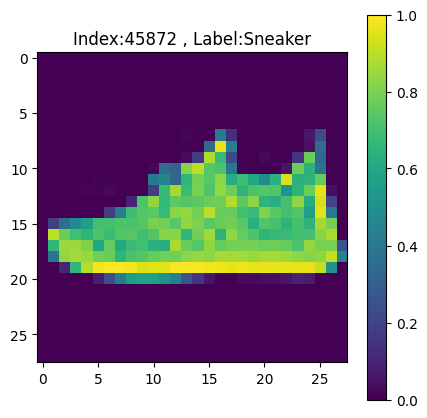

In [ ]:
# 랜덤으로 훈련 데이터의 이미지를 1개 가져오기

random_index = np.random.randint(0, len(train_images))

plt.figure(figsize=(5,5))
plt.imshow(train_images[random_index])
plt.colorbar()
plt.grid(False)
plt.title(f"Index:{random_index} , Label:{class_names[train_labels[random_index]]}")
plt.show()

# imshow()는 픽셀을 색으로 채워서 만든 이미지이다. 행렬을 만들어서 각 칸을 색으로 채운다. imshow()의 colormap은 최솟값이 보라색이고 최댓값이 노란색이다. 행렬의 숫자를 0~1 범위로 노멀라이즈해 색으로 나타낸다.


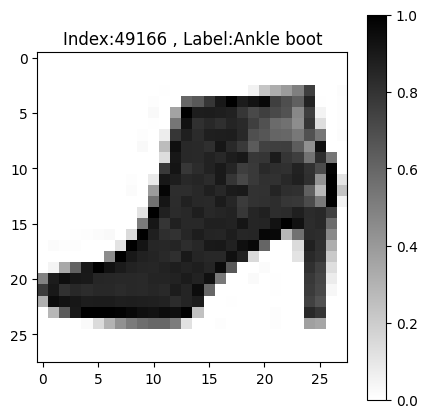

In [ ]:
# 랜덤으로 훈련 데이터의 이미지를 1개 가져오기

random_index = np.random.randint(0, len(train_images))

plt.figure(figsize=(5,5))
plt.imshow(train_images[random_index], cmap = plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.title(f"Index:{random_index} , Label:{class_names[train_labels[random_index]]}")
plt.show()

# imshow()는 픽셀을 색으로 채워서 만든 이미지이다. 행렬을 만들어서 각 칸을 색으로 채운다. imshow()의 colormap은 최솟값이 보라색이고 최댓값이 노란색이다. 행렬의 숫자를 0~1 범위로 노멀라이즈해 색으로 나타낸다.


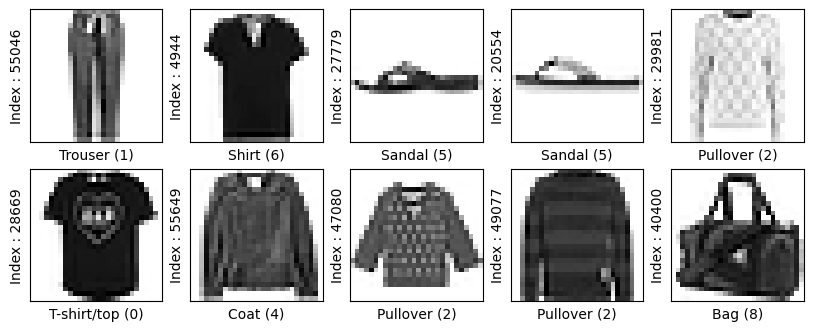

In [ ]:
# 랜덤으로 num 개수만큼 데이터 가져오기

num = 10
random_index_ndarray = np.random.randint(0, len(train_images), size=num)

plt.figure(figsize=(10,10))

for i in range(num):
  index = random_index_ndarray[i]
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[index], cmap = plt.cm.binary) # plt.cm.binary : 이진 색상 맵. 흑백이며 0을 검정색으로 1을 하얀색으로 매핑한다.
  plt.xlabel(f"{class_names[train_labels[index]]} ({train_labels[index]})")
  plt.ylabel(f"Index : {index}")

plt.show()


In [ ]:
# 모델 구성

# layer :  레이어 설정 시 2의 N제곱으로 파라미터를 넣으면 효율적이다.

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),     # Layer: 2차원 배열(28 x 28 픽셀)의 이미지 포맷을 28 * 28 = 784 픽셀의 1차원 배열로 변환합니다. 이미지에 있는 픽셀의 행을 펼쳐서 일렬로 늘립니다. 이 층에는 학습되는 가중치가 없고 데이터를 변환하기만 합니다.
    tf.keras.layers.Dense(128, activation='relu'),    # Layer: 128개의 노드(또는 뉴런)를 가집니다.
    tf.keras.layers.Dense(10)                         # Layer: 10개의 노드의 소프트맥스(softmax) 층입니다. 이 층은 10개의 확률을 반환하고 반환된 값의 전체 합은 1입니다. 각 노드는 현재 이미지가 10개 클래스 중 하나에 속할 확률을 출력합니다.
])

print("\n========== 모델 컴파일 ==========\n")

model.compile(
    optimizer = 'adam',                                                         # 옵티마이저 - 모델이 인식하는 데이터와 해당 손실 함수를 기반으로 모델이 업데이트되는 방식입니다.
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),     # 손실 함수 - 훈련 중 모델이 얼마나 정확한지 측정합니다. 모델을 올바른 방향으로 조정하려면 이 함수를 최소화해야 합니다.
    metrics=['accuracy']                                                        # 메트릭 — 훈련 및 시험 단계를 모니터링하는 데 사용됩니다. 올바르게 분류된 이미지의 비율인 정확도를 사용합니다.
)

print("\n========== 모델 훈련 ==========\n")

epochs_num = 20
model.fit(train_images, train_labels, epochs=epochs_num, verbose=2)              # verbose 파라미터 : 0 - 출력 안함. 1 - 훈련지표와 훈련과정을 프로그래스바로 출력함. 2 - 프로그래스바없이 훈련지표로만 훈련과정을 출력함.



========== 모델 컴파일 ==========


========== 모델 훈련 ==========

Epoch 1/20
1875/1875 - 7s - 4ms/step - accuracy: 0.8240 - loss: 0.5014
Epoch 2/20
1875/1875 - 5s - 2ms/step - accuracy: 0.8643 - loss: 0.3761
Epoch 3/20
1875/1875 - 5s - 3ms/step - accuracy: 0.8758 - loss: 0.3382
Epoch 4/20
1875/1875 - 6s - 3ms/step - accuracy: 0.8858 - loss: 0.3120
Epoch 5/20
1875/1875 - 5s - 2ms/step - accuracy: 0.8925 - loss: 0.2942
Epoch 6/20
1875/1875 - 6s - 3ms/step - accuracy: 0.8964 - loss: 0.2800
Epoch 7/20
1875/1875 - 5s - 3ms/step - accuracy: 0.9017 - loss: 0.2664
Epoch 8/20
1875/1875 - 5s - 3ms/step - accuracy: 0.9046 - loss: 0.2551
Epoch 9/20
1875/1875 - 7s - 4ms/step - accuracy: 0.9082 - loss: 0.2452
Epoch 10/20
1875/1875 - 5s - 2ms/step - accuracy: 0.9104 - loss: 0.2382
Epoch 11/20
1875/1875 - 6s - 3ms/step - accuracy: 0.9140 - loss: 0.2284
Epoch 12/20
1875/1875 - 5s - 3ms/step - accuracy: 0.9173 - loss: 0.2213
Epoch 13/20
1875/1875 - 11s - 6ms/step - accuracy: 0.9194 - loss: 0.2159
Epoch 14/20

In [ ]:
# 평가

print(f"정확도 평가 (epoch:{epochs_num}) - 훈련 데이터")
model.evaluate(train_images, train_labels, verbose=2)
print(f"정확도 평가 (epoch:{epochs_num}) - 시험 데이터")
model.evaluate(test_images, test_labels, verbose=2)


정확도 평가 (epoch:20) - 훈련 데이터
1875/1875 - 3s - 2ms/step - accuracy: 0.9344 - loss: 0.1747
정확도 평가 (epoch:20) - 시험 데이터
313/313 - 0s - 1ms/step - accuracy: 0.8851 - loss: 0.3698


[0.3698018789291382, 0.8851000070571899]

In [ ]:
# 예측

probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])     # 소프트맥스 레이어를 연결하여 로짓을 해석하기 쉬운 확률로 변환
predictions = probability_model.predict(test_images)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [ ]:
# 예측과 정답 비교를 위한 함수 선언

def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(img, cmap=plt.cm.binary)
  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label: color = 'blue'
  else: color = 'red'
  plt.xlabel(
      f"correct : {class_names[true_label]} ({true_label})\npredicted : {class_names[predicted_label]} ({predicted_label}) {100*np.max(predictions_array):2.0f}%",
      color=color
  )
  plt.ylabel(
      f"Index : {i}",
      color=color
  )

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  predicted_label = np.argmax(predictions_array)
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')



랜덤 9280
random_prediction 타입 : <class 'numpy.ndarray'>
random_prediction 형태 : (10,)

[0] 2.55924e-06 (T-shirt/top)
[1] 2.18249e-09 (Trouser)
[2] 2.93775e-02 (Pullover)
[3] 1.43012e-04 (Dress)
[4] 1.11399e-01 (Coat)
[5] 1.23194e-13 (Sandal)
[6] 8.59078e-01 (Shirt)
[7] 2.14117e-11 (Sneaker)
[8] 8.25238e-09 (Bag)
[9] 1.29608e-07 (Ankle boot)

========== 비교 ==========

9280번째 예측 : 6 (Shirt)
9280번째 정답 : 6 (Shirt)




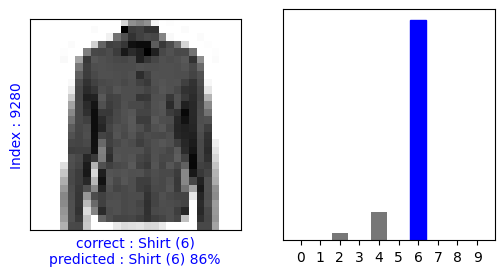

In [ ]:
# 예측값 배열에서 랜덤으로 하나 가져오기

random_index = np.random.randint(0, len(predictions))
random_index = 9280
print(f"\n랜덤 {random_index}")

random_prediction = predictions[random_index]
print(f"random_prediction 타입 : {type(random_prediction)}")
print(f"random_prediction 형태 : {random_prediction.shape}")
print()

for i in range(len(random_prediction)):
  print(f"[{i}] {random_prediction[i]:.5e} ({class_names[i]})") # random_prediction 그대로 출력하면 지수표기법으로 나오는데, 인덱스를 사용함으로써 소수점 형태로 자동 변환한 것을 다시 지수표기법으로 출력한다.

print("\n========== 비교 ==========\n")
print(f"{random_index}번째 예측 : {np.argmax(predictions[random_index])} ({class_names[np.argmax(predictions[random_index])]})")
print(f"{random_index}번째 정답 : {test_labels[random_index]} ({class_names[test_labels[random_index]]})")
print("\n")

# 랜덤 이미지와 해당 이미지의 예측값을 그래프로 그리기

i = random_index
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()


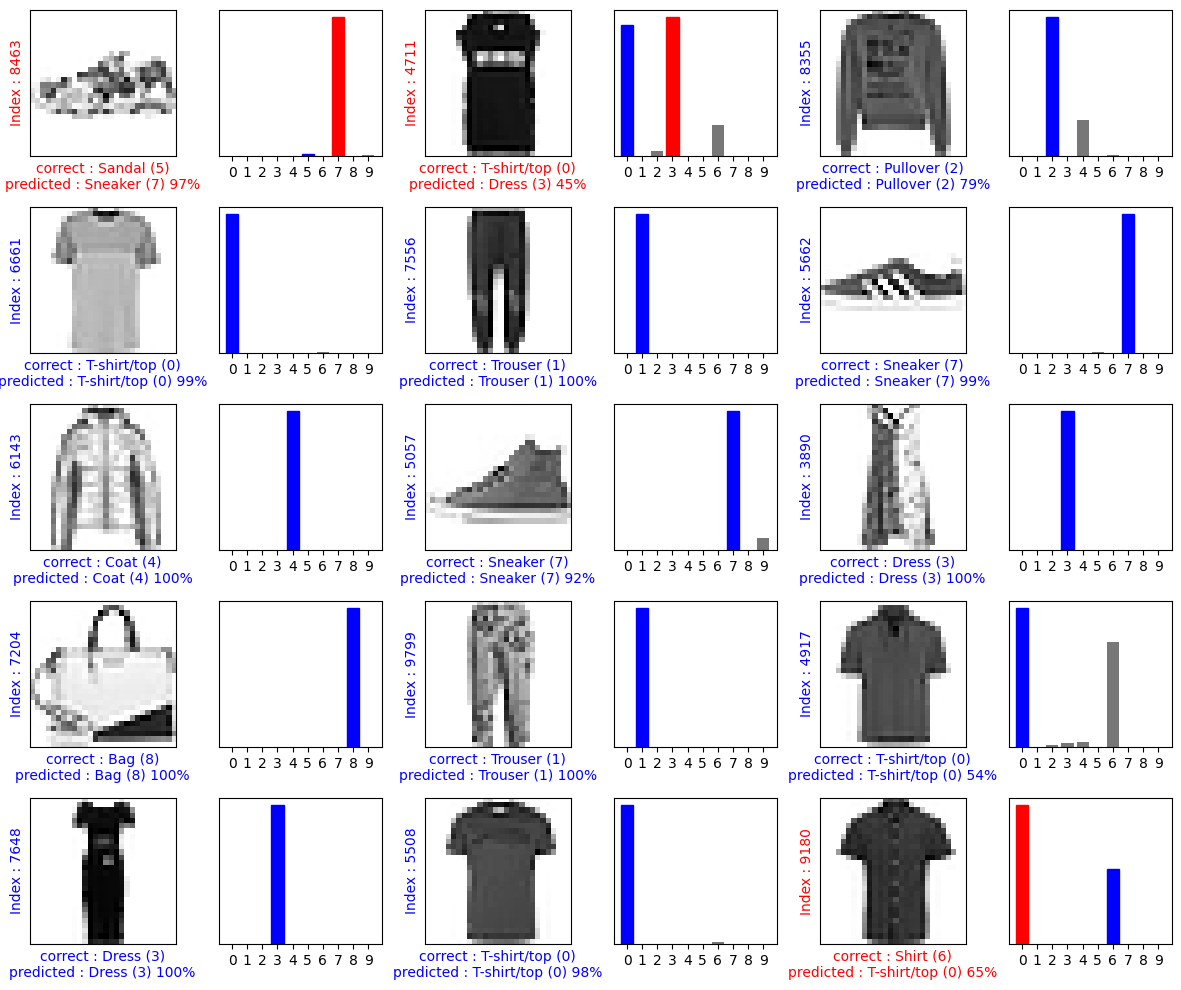

In [ ]:
# 예측값 배열에서 랜덤으로 여러개를 가져오기

num_rows = 5
num_cols = 3
num_images = num_rows*num_cols

plt.figure(figsize=(2*2*num_cols, 2*num_rows)) # 전체 크기 설정 : 가로는 이미지와 그래프이므로 총 2개에 2배만큼 설정하고 세로도 2배만큼 설정한다.

random_index_ndarray = np.random.randint(0, len(predictions)-num_images, num_images)

for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(random_index_ndarray[i], predictions[random_index_ndarray[i]], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(random_index_ndarray[i], predictions[random_index_ndarray[i]], test_labels)

plt.tight_layout()    # 서브플롯들이 겹치지 않도록 자동으로 레이아웃을 조정
plt.show()            # 모든 서브플롯을 한 번에 출력


In [ ]:
# 예측과 정답이 다른 경우

index_list_t = []
index_list_f = []

for i in range(0, len(predictions)):
  if np.argmax(predictions[i]) == test_labels[i]:
    index_list_t.append(i)
  else:
    index_list_f.append(i)

print(f"예측이 맞은 개수 : {len(index_list_t)} / {len(test_labels)}")
print(f"예측이 틀린 개수 : {len(index_list_f)} / {len(test_labels)}")


예측이 맞은 개수 : 8856 / 10000
예측이 틀린 개수 : 1144 / 10000



========== 모델 예측을 위한 데이터의 형태 확인 ==========

 - shape (훈) : (60000, 28, 28)
 - shape (테) : (10000, 28, 28)

========== 모델 예측을 위해 데이터 차원 변경 ==========

 - 차원 변경 전 : (28, 28)
 - 차원 변경 후 : (1, 28, 28)

========== 예측 ==========

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
[0] 1.07273e-01
[1] 3.16390e-07
[2] 8.43671e-01
[3] 3.99650e-04
[4] 7.99483e-04
[5] 2.28923e-08
[6] 4.70621e-02
[7] 1.10426e-04
[8] 3.12473e-04
[9] 3.71312e-04


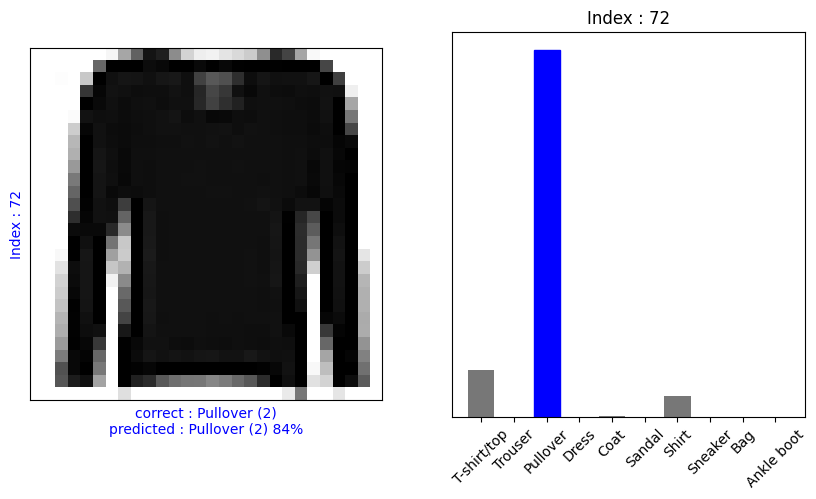

In [ ]:
# 훈련된 모델 사용하기

print("\n========== 모델 예측을 위한 데이터의 형태 확인 ==========\n")

print(" - shape (훈) :", train_images.shape)
print(" - shape (테) :", test_images.shape)

print("\n========== 모델 예측을 위해 데이터 차원 변경 ==========\n")

img = test_images[random_index]
print(" - 차원 변경 전 :", img.shape)
img = (np.expand_dims(img, 0))
print(" - 차원 변경 후 :", img.shape)

print("\n========== 예측 ==========\n")

predictions_single = probability_model.predict(img)

for i in range(len(random_prediction)):
  print(f"[{i}] {random_prediction[i]:.5e}")    # 지수표기법으로 출력 : ~e-N 형태일 때, ~를 10의 -N제곱한 수 (소수점을 앞으로 N번 이동한 수)

i = random_index
plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
_ = plt.yticks([])
_ = plt.title(f"Index : {random_index}")
plt.show()
